<a href="https://colab.research.google.com/github/Eparcham/Spark_Clustring/blob/master/EbrahimParcham_firsthomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install spark

In [2]:
pip install pyspark

     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 198 kB 43.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=df2ee0996697b0500308179fe9bad9fff9f2e82b015f865118bbf06376517c75
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


## Import Lib

In [6]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from datetime import datetime
import matplotlib.dates as md
sc = SparkContext('local')
spark = SparkSession(sc)

ValueError: ignored

## load dataset and spilt to (train,test) and train with 3 cluster and Evaluator clustring with RMSSTD and report center and distnace 

In [7]:
# Loads data.
dataset =  spark.read.format("libsvm").load("long3.txt")
train, test = dataset.randomSplit(weights=[0.9,0.1], seed=200)
# Trains a k-means model.
kmeans = KMeans().setK(3).setSeed(1)
model = kmeans.fit(train)

# Make predictions
predictions = model.transform(train)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Train squared euclidean distance = " + str(silhouette))
print("===================================")
## test evaluator
# Make predictions
predictions_test = model.transform(test)
silhouette_test  = evaluator.evaluate(predictions_test)
print("Test squared euclidean distance = " + str(silhouette_test))

# Shows the result.
centers = model.clusterCenters()
print("===================================")
print("Cluster Centers: ")
for center in centers:
    print(center)

Train squared euclidean distance = 0.7000562525907874
Test squared euclidean distance = 0.5783070501043307
Cluster Centers: 
[-0.12400798 -0.3824405   0.14164648  0.08928576]
[-0.61714976  0.16847825 -0.83861448 -0.87862333]
[ 0.41820979 -0.09490744  0.60828611  0.65277781]


## plot data in matplotlib


In [8]:
def plot_cluster(cluster, color, data_pd):
    data = data_pd[data_pd.label == cluster]
    dates = [x for x in data.features]
    for i in range(len(dates)):
        plt.scatter(dates[i][0],dates[i][1],color=color)

## matplot

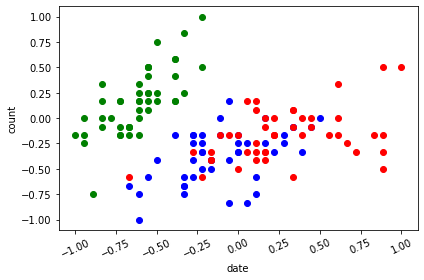

In [9]:
import matplotlib.pyplot as plt
data_pd = train.toPandas()
ax = plt.gca()
plt.xticks(rotation=25)
clusters = [1, 2, 3]
colors = ["green", "blue", "red"]
for cluster, color in zip(clusters, colors):
    plot_cluster(cluster, color, data_pd)


plt.xlabel("date")
plt.ylabel("count")
plt.tight_layout()
plt.show()


## PLOTY PLOT

In [10]:
import plotly.express as px
import pandas as pd

In [11]:
from numpy.ma.core import append
data = data_pd[data_pd.label == 1]
dates = [x for x in data_pd.features]
df = pd.DataFrame(dict(
    x = [dates[i][0] for i in range(len(dates))],
    y = [dates[i][1] for i in range(len(dates))],
    label = ["class1" if i==1 else "class2" if i==2 else "class3"  for i in data_pd.label],
))
fig = px.scatter(df, x="x", y="y" ,color = "label")
fig.show()

In [12]:
train.show(2)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  1.0|(4,[0,1,2,3],[-1....|
|  1.0|(4,[0,1,2,3],[-0....|
+-----+--------------------+
only showing top 2 rows



## Train again with diffrent num of cluster and evaluate data

In [13]:
silhouette_score_train=[]
silhouette_score_test=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='features', metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,10):
    
    KMeans_algo=KMeans(featuresCol='features', k=i)
    
    KMeans_fit=KMeans_algo.fit(train)
    
    output=KMeans_fit.transform(train)
    
    score=evaluator.evaluate(output)
    
    silhouette_score_train.append(score)

    output_test=KMeans_fit.transform(test)
    
    score_test=evaluator.evaluate(output_test)

    silhouette_score_test.append(score_test)
    
    print("Silhouette Score (RMSSTD) Train:",score," Silhouette Score (RMSSTD) Test",score_test)

Silhouette Score (RMSSTD) Train: 0.8006353643726575  Silhouette Score (RMSSTD) Test 0.8858159099436703
Silhouette Score (RMSSTD) Train: 0.7000562525907874  Silhouette Score (RMSSTD) Test 0.5783070501043307
Silhouette Score (RMSSTD) Train: 0.6220486851418268  Silhouette Score (RMSSTD) Test 0.5846865924723273
Silhouette Score (RMSSTD) Train: 0.535520892497383  Silhouette Score (RMSSTD) Test 0.4718227253297446
Silhouette Score (RMSSTD) Train: 0.49707626337250865  Silhouette Score (RMSSTD) Test 0.080161715358821
Silhouette Score (RMSSTD) Train: 0.5167642543082968  Silhouette Score (RMSSTD) Test 0.3418685741625911
Silhouette Score (RMSSTD) Train: 0.49175802386377077  Silhouette Score (RMSSTD) Test 0.14088202706802055
Silhouette Score (RMSSTD) Train: 0.5138085241775722  Silhouette Score (RMSSTD) Test 0.27210592521253857


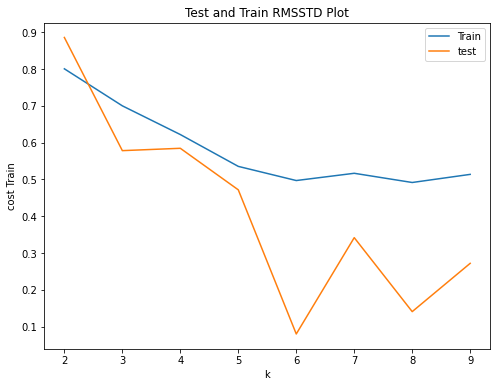

In [14]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.set_title('Test and Train RMSSTD Plot')
ax.plot(range(2,10),silhouette_score_train)
ax.set_xlabel('k')
ax.set_ylabel('cost Train')

ax.plot(range(2,10),silhouette_score_test)
ax.set_xlabel('k')
ax.set_ylabel('cost Train')

ax.legend(['Train', 'test'])